<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://mma.prnewswire.com/media/1860917/NTUC_LHUB_Logo.jpg' style="width: 350px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Project 2 - Healthcare - Predictive Analytics</h1><h2>A Data Analysis - Building Models  </h2><h3></h3></th>
    </tr>
</table>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
cardio_df = pd.read_csv('cardio_cleaned_ClusterAfterSplit.csv')

In [3]:
cardio_df.head(1)

,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group
0,1,0,1,1,0,0,1,2,1,4


# Spliting data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
SEED = 42

In [6]:
# The dataset will be split into 50% training, 50% testing
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)
xy_train, xy_test = train_test_split(cardio_df, test_size=0.5, random_state=SEED)

In [7]:
xy_train.shape

(30071, 10)

In [8]:
xy_test.shape

(30071, 10)

# Clustering

In [9]:
#Clustering
from kmodes.kmodes import KModes

In [10]:
#Building KModes model
km = KModes(n_clusters=5, init = "Huang", n_init = 5,random_state=SEED)
xy_train['clusters'] = km.fit_predict(xy_train)
xy_test['clusters'] = km.fit_predict(xy_test)

In [11]:
display(xy_train.head(1))
display(xy_test.head(1))

,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group,clusters
3984,1,0,1,1,0,0,2,3,2,5,3


,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group,clusters
31483,0,0,1,1,0,1,3,3,2,3,4


# Label Encoder

In [12]:
#Label encoder
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()
xy_train = xy_train.apply(le.fit_transform)
xy_test = xy_test.apply(le.fit_transform)

In [14]:
xy_train.describe()

,active,alco,cholesterol,gluc,smoke,disease,ap_pulse,ap_map,BMI,age_group,clusters
count,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000
mean,0.802567,0.050447,0.351701,0.219913,0.085464,0.487014,2.108743,2.351834,1.673639,4.151541,1.351335
std,0.398068,0.218870,0.671239,0.567221,0.279576,0.499840,0.593682,1.179833,0.903179,1.362162,1.359825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,4.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,5.000000,3.000000
max,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,6.000000,4.000000


# Define x and y

In [15]:
# define x and y
x_train = xy_train.drop('disease', axis=1)
y_train = xy_train['disease']
x_test = xy_test.drop('disease', axis=1)
y_test = xy_test['disease']

In [16]:
x_train.head(1)

,active,alco,cholesterol,gluc,smoke,ap_pulse,ap_map,BMI,age_group,clusters
3984,1,0,0,0,0,2,3,2,5,3


In [17]:
x_test.head(1)

,active,alco,cholesterol,gluc,smoke,ap_pulse,ap_map,BMI,age_group,clusters
31483,0,0,0,0,0,3,3,2,2,4


# Scaling data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Build Baseline Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_baseline = LogisticRegression(random_state=SEED)

In [24]:
lg_baseline.fit(x_train, y_train)

LogisticRegression(random_state=42)

# Evaluate Model Performance with Cross-validation and using Test Data

In [25]:
from sklearn.model_selection import cross_validate, KFold

In [26]:
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

In [27]:
# Access various information including fit times and predict times
cv_results = cross_validate(lg_baseline, x_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=True, n_jobs=-1)

<font color="blue">CV Accuracy:

In [28]:
print("Training Score:", cv_results['train_accuracy'].mean())
print("Test Score:", cv_results['test_accuracy'].mean())
print("Fit Time:", cv_results['fit_time'].mean(), 'seconds')
print("Predict Time:", cv_results['score_time'].mean(), 'seconds')

Training Score: 0.7237205274542023
Test Score: 0.7237204074394438
Fit Time: 0.07767634391784668 seconds
Predict Time: 0.002664518356323242 seconds


<font color="blue">Test Data Accuracy:

In [29]:
print('Training Accuracy: ',lg_baseline.score(x_train,y_train), '\nTest Accuracy: ', lg_baseline.score(x_test,y_test))

Training Accuracy:  0.723554254929999 
Test Accuracy:  0.71570616208307


# Build Other Models

In [30]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
print('Training Accuracy: ',KNN.score(x_train,y_train), '\nTest Accuracy: ', KNN.score(x_test,y_test))

Training Accuracy:  0.9043264274550231 
Test Accuracy:  0.8510525090618869


In [33]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(random_state=SEED)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [34]:
print('Training Accuracy: ',svc.score(x_train,y_train), '\nTest Accuracy: ', svc.score(x_test,y_test))

Training Accuracy:  0.8698746300422334 
Test Accuracy:  0.8689102457517209


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
print('Training Accuracy: ',dt.score(x_train,y_train), '\nTest Accuracy: ', dt.score(x_test,y_test))

Training Accuracy:  0.9295001829004689 
Test Accuracy:  0.9107778258122443


In [37]:
#naive bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [38]:
print('Training Accuracy: ',gnb.score(x_train,y_train), '\nTest Accuracy: ', gnb.score(x_test,y_test))

Training Accuracy:  0.7154068704067041 
Test Accuracy:  0.7247514216354627


In [39]:
#naive bayes (multinomial)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [40]:
print('Training Accuracy: ',mnb.score(x_train,y_train), '\nTest Accuracy: ', mnb.score(x_test,y_test))

Training Accuracy:  0.6312061454557547 
Test Accuracy:  0.6369259419374148


In [41]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
cv_results = cross_validate(rf, x_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=True, n_jobs=-1)

In [43]:
print("Training Score:", cv_results['train_accuracy'].mean())
print("Test Score:", cv_results['test_accuracy'].mean())
print("Fit Time:", cv_results['fit_time'].mean(), 'seconds')
print("Predict Time:", cv_results['score_time'].mean(), 'seconds')

Training Score: 0.9306474636318169
Test Score: 0.9145022821507366
Fit Time: 1.8418370723724364 seconds
Predict Time: 0.14265613555908202 seconds


In [44]:
print('Training Accuracy: ',rf.score(x_train,y_train), '\nTest Accuracy: ', rf.score(x_test,y_test))

Training Accuracy:  0.9295001829004689 
Test Accuracy:  0.9160985667254166


In [45]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=SEED)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
print('Training Accuracy: ',gb.score(x_train,y_train), '\nTest Accuracy: ', gb.score(x_test,y_test))

Training Accuracy:  0.919922849256759 
Test Accuracy:  0.8835422832629444


In [47]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=SEED)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
print('Training Accuracy: ',xgb.score(x_train,y_train), '\nTest Accuracy: ', xgb.score(x_test,y_test))

Training Accuracy:  0.924312460510126 
Test Accuracy:  0.8851717601676033


In [49]:
#lightgbm
import lightgbm
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 14645, number of negative: 15426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 30071, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487014 -> initscore=-0.051955
[LightGBM] [Info] Start training from score -0.051955


LGBMClassifier()

In [50]:
print('Training Accuracy: ',lgbm.score(x_train,y_train), '\nTest Accuracy: ', lgbm.score(x_test,y_test))

Training Accuracy:  0.9234145854810283 
Test Accuracy:  0.8856373249975059


# Model Performance Summary by Test Data

In [89]:
models = [lg_baseline, KNN, svc, dt, gnb, mnb, rf, gb, xgb, lgbm]
model_names = [type(model).__name__ for model in models]
result_table_Test = pd.DataFrame(columns=['Model','Training Accuracy','Test Accuracy'])

for model, m_name in zip(models, model_names):
    train_accu = model.score(x_train,y_train)
    test_accu = model.score(x_test,y_test)
    result_table_Test = pd.concat([result_table_Test,pd.DataFrame({'Model':[m_name], 'Training Accuracy':[train_accu],
                                                         'Test Accuracy':[test_accu]})],ignore_index=True)

In [91]:
result_table_Test_sorted = result_table_Test.sort_values(by='Test Accuracy', ascending = False)
display(result_table_Test_sorted)

,Model,Training Accuracy,Test Accuracy
6,RandomForestClassifier,0.929500,0.916099
3,DecisionTreeClassifier,0.929500,0.910778
9,LGBMClassifier,0.923415,0.885637
8,XGBClassifier,0.924312,0.885172
7,GradientBoostingClassifier,0.919923,0.883542
2,SVC,0.869875,0.868910
1,KNeighborsClassifier,0.904326,0.851053
4,GaussianNB,0.715407,0.724751
0,LogisticRegression,0.723554,0.715706
5,MultinomialNB,0.631206,0.636926


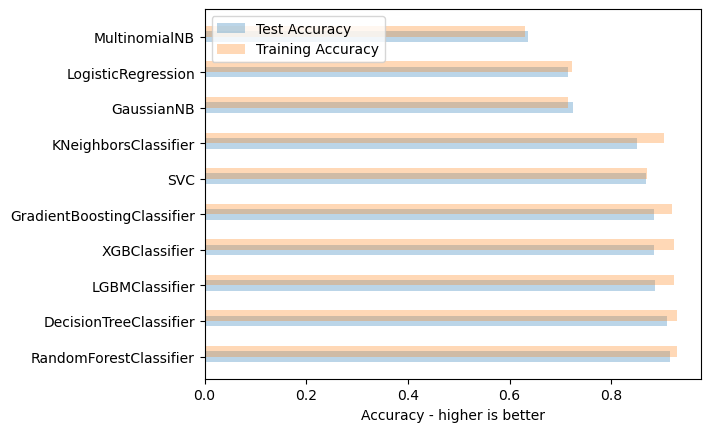

In [93]:
plt.barh(width=result_table_Test_sorted['Test Accuracy'],y=result_table_Test_sorted['Model'], alpha=0.3, height=0.3, label='Test Accuracy')
plt.barh(width=result_table_Test_sorted['Training Accuracy'],y=result_table_Test_sorted['Model'],align='edge', alpha=0.3, height=0.3, label='Training Accuracy')
plt.legend(loc='upper left')
plt.xlabel('Accuracy - higher is better')
plt.show()

# Model Performance Summary by CV

In [51]:
models = [lg_baseline, KNN, svc, dt, gnb, mnb, rf, gb, xgb, lgbm]
model_names = [type(model).__name__ for model in models]
result_table = pd.DataFrame(columns=['Model','Training Accuracy','Test Accuracy','Fit Time (seconds)','Predict Time (seconds)','Total time taken (seconds)'])

for model, m_name in zip(models, model_names):
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=True, n_jobs=-1)
    train_accu = cv_results['train_accuracy'].mean()
    test_accu = cv_results['test_accuracy'].mean()
    fit = cv_results['fit_time'].mean()
    pred = cv_results['score_time'].mean()
    total = fit + pred
    result_table = pd.concat([result_table,pd.DataFrame({'Model':[m_name], 'Training Accuracy':[train_accu],
                                                         'Test Accuracy':[test_accu],'Fit Time (seconds)':[fit], 'Predict Time (seconds)':[pred],
                                                        'Total time taken (seconds)':[total]})],ignore_index=True)

In [52]:
result_table_sorted = result_table.sort_values(by='Test Accuracy', ascending = False)
display(result_table_sorted)

,Model,Training Accuracy,Test Accuracy,Fit Time (seconds),Predict Time (seconds),Total time taken (seconds)
7,GradientBoostingClassifier,0.919507,0.918759,3.852875,0.029911,3.882786
9,LGBMClassifier,0.924121,0.917495,0.913200,0.033773,0.946973
8,XGBClassifier,0.925327,0.916198,0.477212,0.042048,0.519260
6,RandomForestClassifier,0.930647,0.914502,2.575799,0.205714,2.781513
3,DecisionTreeClassifier,0.930647,0.911809,0.030340,0.002818,0.033158
1,KNeighborsClassifier,0.901408,0.882511,0.109551,3.061852,3.171403
2,SVC,0.855201,0.851817,45.410839,19.341977,64.752816
0,LogisticRegression,0.723721,0.723720,0.070961,0.002475,0.073435
4,GaussianNB,0.715124,0.714908,0.020533,0.004578,0.025111
5,MultinomialNB,0.631638,0.631672,0.020561,0.002798,0.023359


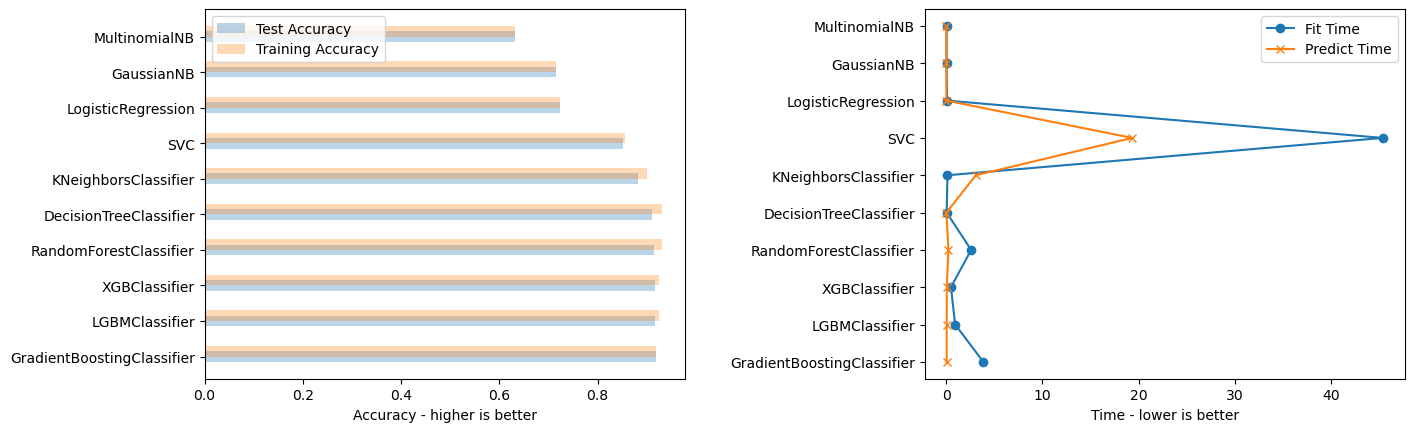

In [53]:
plt.subplot(1,2,1)
plt.barh(width=result_table_sorted['Test Accuracy'],y=result_table_sorted['Model'], alpha=0.3, height=0.3, label='Test Accuracy')
plt.barh(width=result_table_sorted['Training Accuracy'],y=result_table_sorted['Model'],align='edge', alpha=0.3, height=0.3, label='Training Accuracy')
plt.legend(loc='upper left')
plt.xlabel('Accuracy - higher is better')
plt.subplot(1,2,2)
plt.plot(result_table_sorted['Fit Time (seconds)'],result_table_sorted['Model'], marker='o', label='Fit Time')
plt.plot(result_table_sorted['Predict Time (seconds)'],result_table_sorted['Model'], marker='x', label='Predict Time')
plt.legend()
plt.xlabel('Time - lower is better')
plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

<font color="blue">We will select XGBClassifier, Logistic Regression, Decision Tree, Random Forest, and K-NearestNeighbours for Hyperparameter Optimization

# Hyperparameters Optimization by CV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the classifiers
classifiers = {
    'XGBClassifier': XGBClassifier(random_state=SEED),
    'LogisticRegression': LogisticRegression(random_state=SEED),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=SEED),
    'RandomForestClassifier': RandomForestClassifier(random_state=SEED),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Define the parameter grids for each classifier
param_grids = {
    'XGBClassifier': {'classifier__max_depth': [3, 5, 7], 'classifier__learning_rate': [0.1, 0.01, 0.05],
                     'classifier__n_estimators': [100,200,300], 'classifier__min_child_weight': [1,3,5],
                     'classifier__gamma': [0.0, 0.1, 0.2], 'classifier__subsample': [0.8,0.9,1.0],
                     'classifier__colsample_bytree': [0.8,0.9,1.0]},
    'LogisticRegression': {'classifier__C': [1, 10, 20], 'classifier__solver': ['lbfgs', 'liblinear']},
    'DecisionTreeClassifier': {'classifier__max_depth': [3, 5, 25], 'classifier__max_leaf_nodes': [10,20,100]},
    'RandomForestClassifier': {'classifier__n_estimators': [100,300,500], 'classifier__max_depth': [3, 10, 50], 'classifier__max_leaf_nodes': [20,100,250]},
    'KNeighborsClassifier': {'classifier__n_neighbors': [5, 30, 50], 'classifier__weights': ['uniform','distance']}
}

# Create pipelines for each classifier
pipelines = {name: Pipeline([('classifier', clf)]) for name, clf in classifiers.items()}

# Perform grid search for each classifier
results = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_
    }

In [55]:
results

{'XGBClassifier': {'best_params': {'classifier__colsample_bytree': 0.9,
   'classifier__gamma': 0.0,
   'classifier__learning_rate': 0.05,
   'classifier__max_depth': 3,
   'classifier__min_child_weight': 5,
   'classifier__n_estimators': 300,
   'classifier__subsample': 0.9},
  'best_score': 0.9195237380443139,
  'cv_results': {'mean_fit_time': array([0.87001348, 0.93966961, 0.62924795, ..., 3.27760305, 3.07333159,
          1.76818962]),
   'std_fit_time': array([0.03077582, 0.0452041 , 0.00667361, ..., 0.04343273, 0.22104231,
          0.05096403]),
   'mean_score_time': array([0.03140006, 0.02880144, 0.03300138, ..., 0.16601262, 0.14083056,
          0.08037   ]),
   'std_score_time': array([0.00257588, 0.00097976, 0.00296615, ..., 0.00629161, 0.03700393,
          0.01307189]),
   'param_classifier__colsample_bytree': masked_array(data=[0.8, 0.8, 0.8, ..., 1.0, 1.0, 1.0],
                mask=[False, False, False, ..., False, False, False],
          fill_value='?',
              

In [56]:
Models = [
    'XGBClassifier',
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'KNeighborsClassifier']

Tabs = ['A', 'B', 'C', 'D', 'E']

op_table = pd.DataFrame(columns=['Model','Fit Time (seconds)','Predict Time (seconds)','Test Accuracy (Optimized)'])

for tab, Model in zip(Tabs, Models):
    tab_df = pd.DataFrame(results[Model]['cv_results'])
    num_entries = len(tab_df)  # Get the number of entries in cv_results
    for num in range(num_entries):
        if tab_df['rank_test_score'][num] == 1:
            fit_time = tab_df['mean_fit_time'][num]
            score_time = tab_df['mean_score_time'][num]
            Test_accuracy = tab_df['mean_test_score'][num]
            op_table = pd.concat([op_table,pd.DataFrame({'Model':[Model],'Fit Time (seconds)':[fit_time],
                                                         'Predict Time (seconds)':[score_time],'Test Accuracy (Optimized)':[Test_accuracy]})],ignore_index=True)


In [57]:
op_table

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized)
0,XGBClassifier,2.674268,0.076207,0.919524
1,LogisticRegression,0.218980,0.007802,0.723221
2,DecisionTreeClassifier,0.074994,0.007410,0.917229
3,RandomForestClassifier,17.156275,0.887104,0.917761
4,KNeighborsClassifier,0.339377,6.364325,0.891058


In [58]:
compare_table = op_table.merge(result_table_sorted[['Model','Test Accuracy']],how='inner',on='Model')

In [59]:
compare_table

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized),Test Accuracy
0,XGBClassifier,2.674268,0.076207,0.919524,0.916198
1,LogisticRegression,0.218980,0.007802,0.723221,0.723720
2,DecisionTreeClassifier,0.074994,0.007410,0.917229,0.911809
3,RandomForestClassifier,17.156275,0.887104,0.917761,0.914502
4,KNeighborsClassifier,0.339377,6.364325,0.891058,0.882511


In [60]:
compare_table['% Difference'] = (compare_table['Test Accuracy (Optimized)'] - compare_table['Test Accuracy'])*100

In [61]:
compare_table['% Difference'] = compare_table['% Difference'].map('{:.2f}'.format)

In [62]:
compare_table = compare_table.sort_values(by='Test Accuracy (Optimized)', ascending=False)

In [63]:
compare_table

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized),Test Accuracy,% Difference
0,XGBClassifier,2.674268,0.076207,0.919524,0.916198,0.33
3,RandomForestClassifier,17.156275,0.887104,0.917761,0.914502,0.33
2,DecisionTreeClassifier,0.074994,0.007410,0.917229,0.911809,0.54
4,KNeighborsClassifier,0.339377,6.364325,0.891058,0.882511,0.85
1,LogisticRegression,0.218980,0.007802,0.723221,0.723720,-0.05


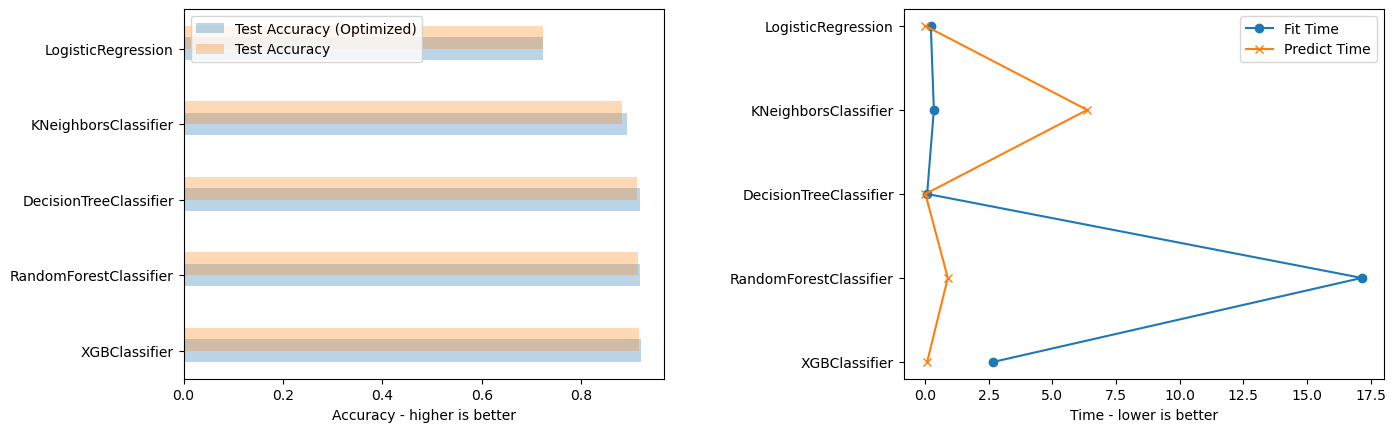

In [64]:
plt.subplot(1,2,1)
plt.barh(width=compare_table['Test Accuracy (Optimized)'],y=compare_table['Model'], alpha=0.3, height=0.3, label='Test Accuracy (Optimized)')
plt.barh(width=compare_table['Test Accuracy'],y=compare_table['Model'],align='edge', alpha=0.3, height=0.3, label='Test Accuracy')
plt.legend(loc='upper left')
plt.xlabel('Accuracy - higher is better')
plt.subplot(1,2,2)
plt.plot(compare_table['Fit Time (seconds)'],compare_table['Model'], marker='o', label='Fit Time')
plt.plot(compare_table['Predict Time (seconds)'],compare_table['Model'], marker='x', label='Predict Time')
plt.legend()
plt.xlabel('Time - lower is better')
plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

# Final Model Evaluation

In [65]:
#best parameters for Decision Tree model
results['DecisionTreeClassifier']['best_params']

{'classifier__max_depth': 25, 'classifier__max_leaf_nodes': 20}

In [79]:
dt_op = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=20, random_state=SEED)
dt_op.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=20, random_state=42)

In [80]:
print('Training Accuracy: ',dt_op.score(x_train,y_train), '\nTest Accuracy: ', dt_op.score(x_test,y_test))

Training Accuracy:  0.9180605899371488 
Test Accuracy:  0.9117422101027568


In [81]:
y_pred = dt_op.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
dfConfu = confusion_matrix(y_test, y_pred)

In [84]:
print(dfConfu)

[[13708  1645]
 [ 1009 13709]]


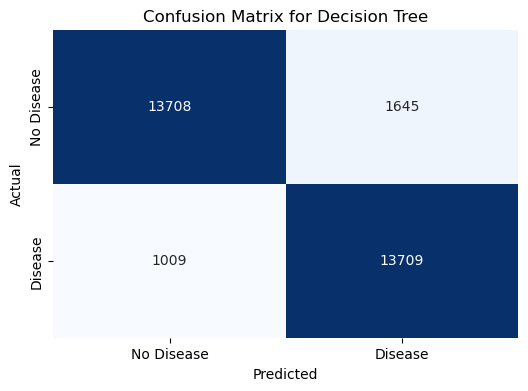

In [85]:
plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [86]:
from sklearn.metrics import classification_report

In [87]:
report_dt = classification_report(y_test, y_pred, target_names=['No Disease','Disease'])

In [88]:
print(report_dt)

              precision    recall  f1-score   support

  No Disease       0.93      0.89      0.91     15353
     Disease       0.89      0.93      0.91     14718

    accuracy                           0.91     30071
   macro avg       0.91      0.91      0.91     30071
weighted avg       0.91      0.91      0.91     30071



<font color="blue">The final Decision Tree model gives a test accuracy of 91.2% using Test Data.

<font color="blue">Out of the cases predicted with Heart Disease, 89% are actually diagnosed with Heart Disease.
Out of the cases predicted with no Heart Disease, 93% are actually diagnosed with no Heart Disease.

<font color="blue">From all cases with Heart Disease, 93% are predicted correctly.
From all cases with no Heart Disease, 89% are predicted correctly.

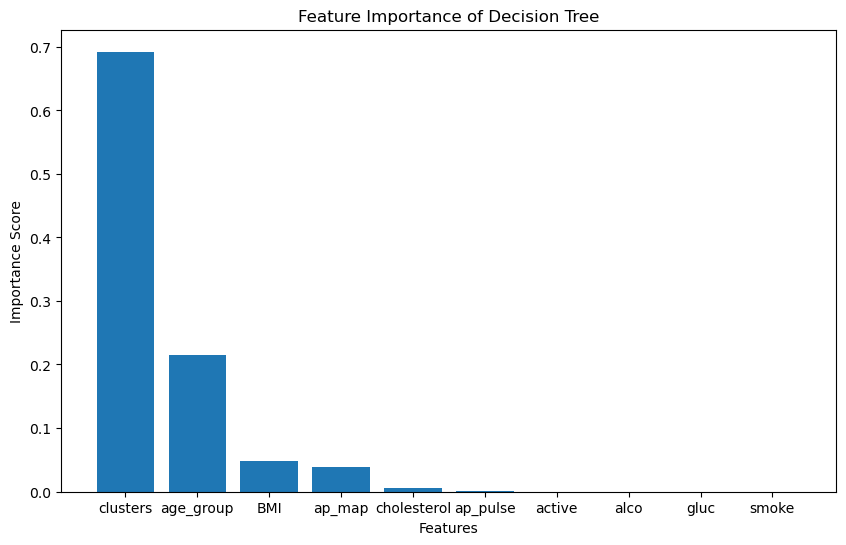

In [104]:
feature_importances = dt_op.feature_importances_
feature_names = xy_train.drop('disease', axis=1).columns
sorted_indices = (-feature_importances).argsort()
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Decision Tree')
plt.show()

# Conclusion and Recommendation

Using clustering before model building requires careful consideration.

First of all, clustering should be carried out after splitting the data to prevent data leakage.

Secondly, When test dataset is too small or not representative of the overall dataset, the clustering may fail. This explains why using different random state, we get very diverse result ranging from single digit accuracy to 85% accuracy. Therefore a sufficiently large test dataset is required to use the clustering technique.

Besides that, the shortcoming of clustering in test dataset will not be able to be reflected in cross validation as cross validation only looks at training dataset. Hence verifying accuracy of the test dataset is required when using clustering in data preprocessing.

Considering the above, 50:50 train test split is performed instead of 70:30. With test data becomes larger, the clustering score becomes more stable with different random state, giving smaller fluctuation.

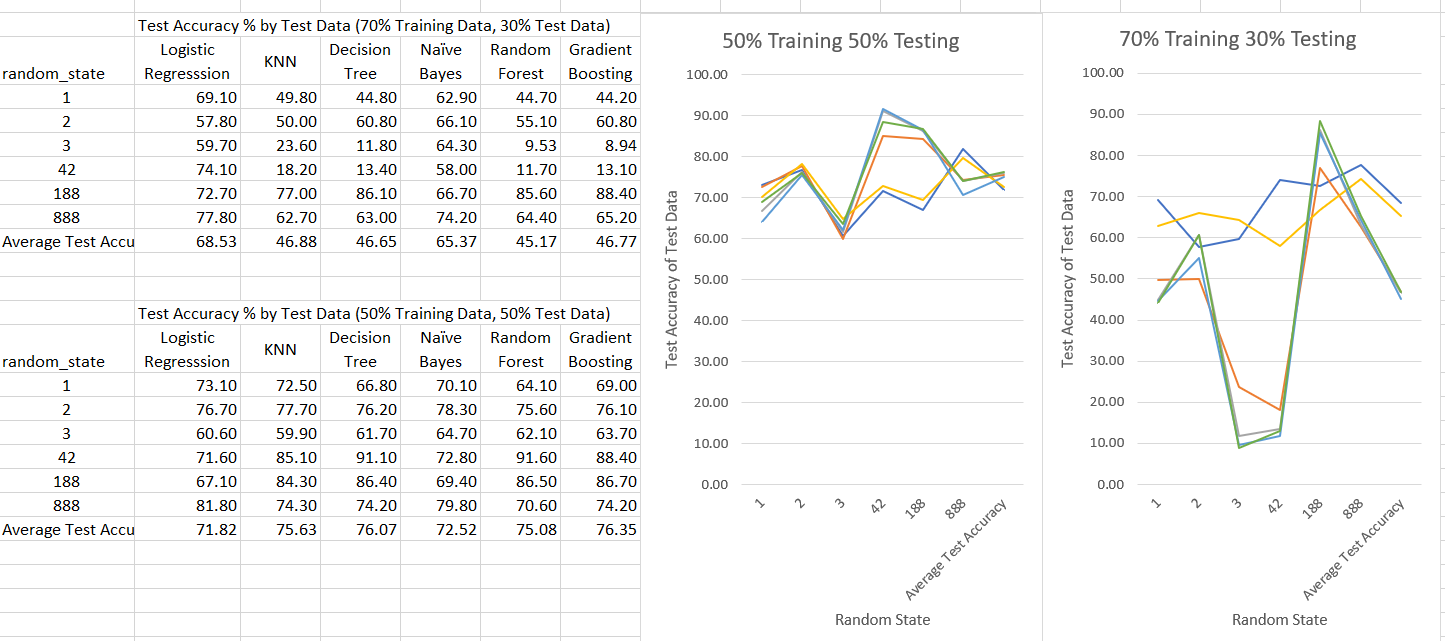

With a sufficiently large dataset, clustering in preprocessing step could be quite useful in improving model accuracy.


